# PRACTICA EVALUACIÓN FINAL - PARTE II #
Esta segunda parte supone el 25% restante de tarea práctica final del módulo de minería de datos. Junto con la parte 1, ambas puntúan el 60% de la nota final.

En esta parte 2 se pretende evaluar los conceptos relacionados con el analisis de series temporales y su aplicación a modelos de predicción.

Comenzando con esta parte de la práctica, en el primer bloque de código, conviene cargar las librerías que se van a utilizar a lo largo del notebook.

In [127]:
# importar librerias
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
import numpy as np
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.arima.model import ARIMA

En el siguiente paso procedemos a cargar el fichero *Microsoft_Stock.csv* que servirá como conjunto de datos para llevar a cabo toda la evaluación de esta parte II. Se trata de un fichero en el que cada registro contiene para un día concreto datos de apertura, cierre, máximo, mínimo y volumen de cotización de las acciones de Microsoft en la bolsa de Nueva York. Se trata por tanto de un clásico problema de predicción de valores futuros. 

In [129]:
# Cargar el fichero de datos en un DataFrame

ruta = r"C:\Users\Usuario\Desktop\Microsoft_Stock.csv" 
df = pd.read_csv(ruta)

En los siguientes bloques de código el alumno debe programar las sentencias de código que considere oportunas para hacerse una idea general de los datos y de las variables. Visualización de datos, gráficos, etc. Los bloques son orientativos, el alumno puede añadir cuantos considere y codificarlos según su criterio.

In [131]:
# Mostrar los 10 primeros registros
print(df.head(10))

                 Date   Open   High    Low  Close    Volume
0   4/1/2015 16:00:00  40.60  40.76  40.31  40.72  36865322
1   4/2/2015 16:00:00  40.66  40.74  40.12  40.29  37487476
2   4/6/2015 16:00:00  40.34  41.78  40.18  41.55  39223692
3   4/7/2015 16:00:00  41.61  41.91  41.31  41.53  28809375
4   4/8/2015 16:00:00  41.48  41.69  41.04  41.42  24753438
5   4/9/2015 16:00:00  41.25  41.62  41.25  41.48  25723861
6  4/10/2015 16:00:00  41.63  41.95  41.41  41.72  28022002
7  4/13/2015 16:00:00  41.40  42.06  41.39  41.76  30276692
8  4/14/2015 16:00:00  41.80  42.03  41.39  41.65  24244382
9  4/15/2015 16:00:00  41.76  42.46  41.68  42.26  27343581


# Describir el DataFrame
El dataframe parece describir la evolución del valor de las acciones de microsoft a lo largo del tiempo mostrando, el momento de apertura, el de cierre así como su punto más alto y mas bajo del día.

In [133]:
# Mostrar las columnas y tipos de datos
print(df.dtypes)

Date       object
Open      float64
High      float64
Low       float64
Close     float64
Volume      int64
dtype: object


In [134]:
# ...

In [135]:
# ...

Se ha de filtrar la serie quedandose solo con los datos desde el año 2020 (incluido) en adelante. Una vez filtrada, mostrar la serie temporal de la variable ***Close*** en un gráfico de línea.

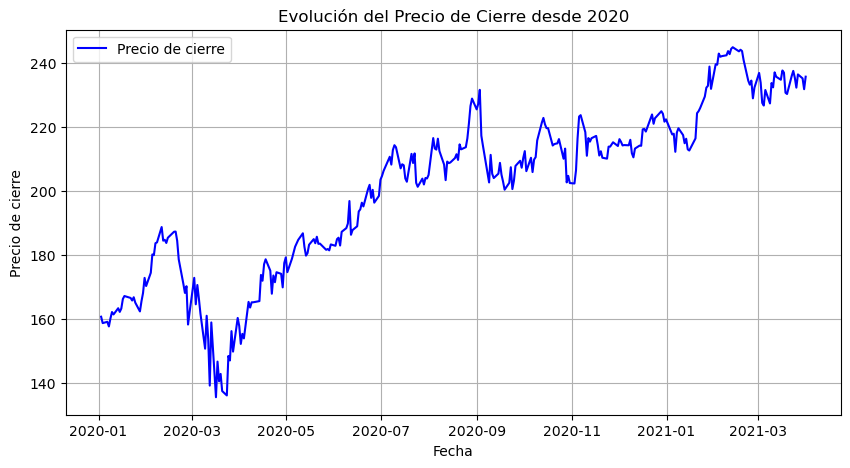

In [137]:
# Filtrar datos desde 2020
df['Date'] = pd.to_datetime(df['Date'])
df_filtrado = df[df['Date'] >= '2020-01-01']
plt.figure(figsize=(10, 5))
plt.plot(df_filtrado['Date'], df_filtrado['Close'], label='Precio de cierre', color='b')
plt.xlabel('Fecha')
plt.ylabel('Precio de cierre')
plt.title('Evolución del Precio de Cierre desde 2020')
plt.legend()
plt.grid()
plt.show()

### Pregunta 1 ###
En primera instancia echando un vistazo a la serie en la gráfica, ¿Qué pinta tiene la serie en cuanto a estacionariedad? Describe brevemente las impresiones acerca de porque parece que la serie es o no estacionaria.

***Respuesta:***

Podemos ver que la serie no es estacionaria ya que la varianza no es estable a lo largo del periodo. 

A continuación pasamos a analizar desde un punto de vista más formal la estacionariedad de la serie. En primer lugar calcular las funciones de autocorrelación y autocorrelación parcial y mostrar las gráficas con ambas funciones.

<Figure size 1200x500 with 0 Axes>

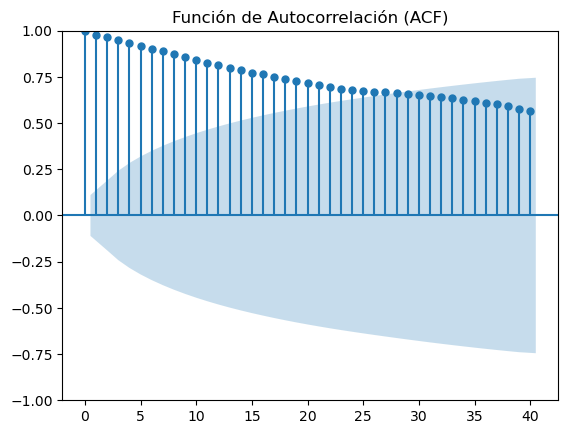

In [142]:
# Gráfica ACF
df_filtrado.set_index('Date', inplace=True)
plt.figure(figsize=(12, 5))
plot_acf(df_filtrado['Close'].dropna(), lags=40)
plt.title("Función de Autocorrelación (ACF)")
plt.show()

<Figure size 1200x500 with 0 Axes>

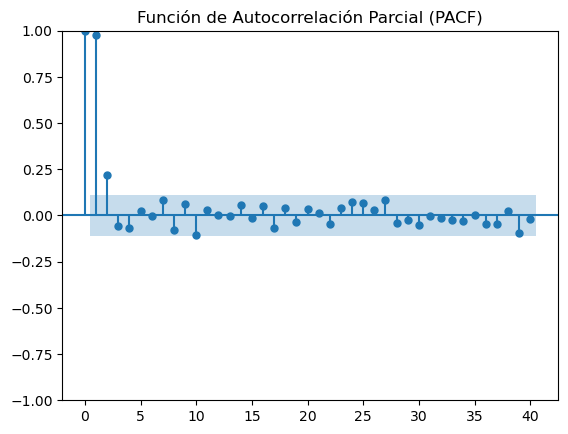

In [143]:
# Gráfica PACF
plt.figure(figsize=(12, 5))
plot_pacf(df_filtrado['Close'].dropna(), lags=40)
plt.title("Función de Autocorrelación Parcial (PACF)")
plt.show()

### Pregunta 2 ###
A la vista de las 2 gráficas de autocorrelación, ¿Se aprecian signos de estacionariedad en la serie? ¿Por qué? ¿Se aprecian signos de estacionalidad? ¿Por qué?

***Respuesta:***

La serie no es completamente estacionaria pero si depende de sus valores pasados pero disminuye esta dependencia conforme se alejan estos valores.

Ahora mediante un test de Dickey Fuller aumentado, realizamos la última comprobación de estacionariedad de la serie.

In [148]:
# Test de Dickey Fuller Aumentado
resultado_adf = adfuller(df_filtrado['Close'].dropna())
print("Resultados del Test de Dickey-Fuller Aumentado:")
print(f"Estadístico ADF: {resultado_adf[0]}")
print(f"p-valor: {resultado_adf[1]}")
print(f"Número de rezagos usados: {resultado_adf[2]}")
print(f"Número de observaciones usadas: {resultado_adf[3]}")
print("Valores críticos:")
for clave, valor in resultado_adf[4].items():
    print(f"\t{clave}: {valor}")


Resultados del Test de Dickey-Fuller Aumentado:
Estadístico ADF: -1.4029588977517948
p-valor: 0.5808567665335324
Número de rezagos usados: 9
Número de observaciones usadas: 304
Valores críticos:
	1%: -3.452045317832011
	5%: -2.871094805558846
	10%: -2.571860921485457


### Pregunta 3 ###
Según el test realizado, ¿es estacionaria la serie?

***Respuesta:***

Al ser p-valor>0.05 no podemos rechazar H0 por lo tanto la serie no es estacionaria. 

Seguimos con el analisis y para ello vamos a tratar de modelar la serie con un suavizado exponencial y predecir con este modelo algunos de los puntos finales de la serie. En primer lugar, el alumno debe escoger, teniendo en cuenta lo aprendido en el analisis realizado hasta aquí, el modelo adecuado de suavizado exponencial. A continuación, utilizará todos los datos excepto los 30 últimos días de la serie, y modelará el suavizado con dichos datos. Con este modelo, debe predecir los 30 valores restantes y por último, debe mostrar en una misma gráfica: la serie original en un color hasta el punto donde comienzan los datos de validación (30 últimos puntos), los 30 últimos puntos de la serie original en otro color y, por último, en un tercer color, los puntos predichos por el modelo de suavizado.

In [153]:
print(df_filtrado.columns)
print(df_filtrado.index.name)  
print(df_filtrado.head())      


Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')
Date
                       Open    High     Low   Close    Volume
Date                                                         
2020-01-02 16:00:00  158.78  160.73  158.33  160.62  22634546
2020-01-03 16:00:00  158.32  159.95  158.06  158.62  21121681
2020-01-06 16:00:00  157.08  159.10  156.51  159.03  20826702
2020-01-07 16:00:00  159.32  159.67  157.32  157.58  21881740
2020-01-08 16:00:00  158.93  160.80  157.95  160.09  27762026


In [154]:

if 'Date' not in df_filtrado.columns:
    df_filtrado.reset_index(inplace=True)  


df_filtrado['Date'] = pd.to_datetime(df_filtrado['Date'])  
df_filtrado.set_index('Date', inplace=True)  


train = df_filtrado.iloc[:-30]  
test = df_filtrado.iloc[-30:]


C:\Users\Usuario\AppData\Local\Temp\ipykernel_18436\706365692.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['Date'] = pd.to_datetime(df_filtrado['Date'])


In [155]:
# Crear y ajustar el modelo de suavizado escogido
modelo = Holt(train['Close'], initialization_method="estimated")
resultado = modelo.fit()

C:\Users\Usuario\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [156]:
# Predecir los datos validación
predicciones = resultado.forecast(30)

C:\Users\Usuario\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Usuario\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


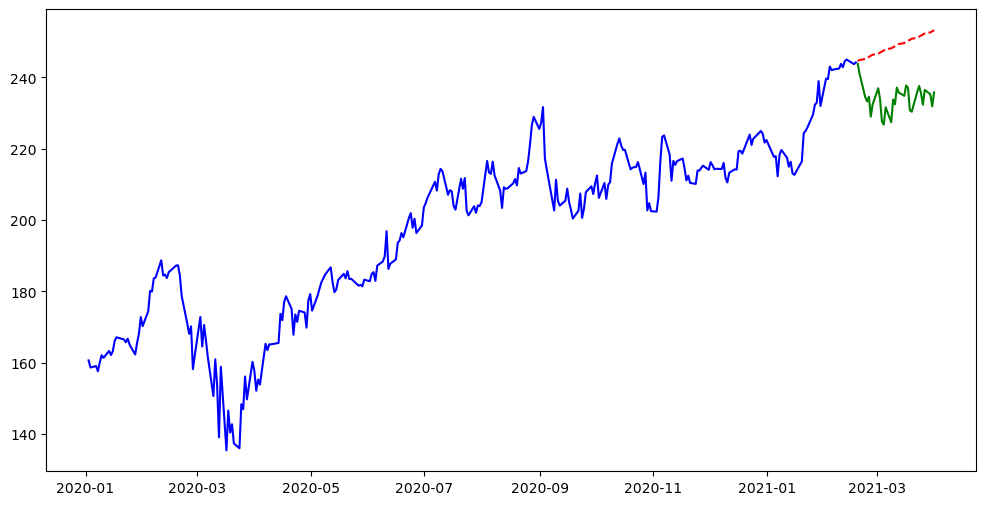

In [157]:
# Mostrar en gráfico los resultados y la serie original.
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['Close'], label='Datos de entrenamiento', color='blue')
plt.plot(test.index, test['Close'], label='Datos de validación', color='green')
plt.plot(test.index, predicciones, label='Predicciones (Holt)', color='red', linestyle="dashed")

### Pregunta 4 ###
¿Qué tipo de suavizado exponencial se ha empleado y por qué?

***Respuesta:***

He elegido Holt porque el dataset muestra una tendencia clara y no presenta una estacionalidad muy determinante. Así de este modo podemos capturar la tendencia y hacer predicciones más precisas.  

Pasamos ahora a entrenar un modelo autoregresivo para, de nuevo, predecir los 30 últimos valores. En este caso, si en puntos anteriores de esta práctica se hubiera determinado que la serie no es estacionaria, se debe convertir en estacionaria y comprobar que efectivamente lo es después de la transformación. Una vez que sea estacionaria, se ha de seleccionar en base a la función de autocorrelación (ACF) y/o la autocorrelación parcial (PACF) el orden adecuado del modelo autoregresivo (AR).

In [162]:
# Transformar la serie en estacionaria en caso de que no lo fuera
df['Close_diff'] = df['Close'].diff().dropna()

In [163]:
# Comprobación de estacionariedad
resultado_adf_diff = adfuller(df['Close_diff'].dropna())
print("Nuevo p-valor después de la diferenciación:", resultado_adf_diff[1])

Nuevo p-valor después de la diferenciación: 1.519593991753391e-17


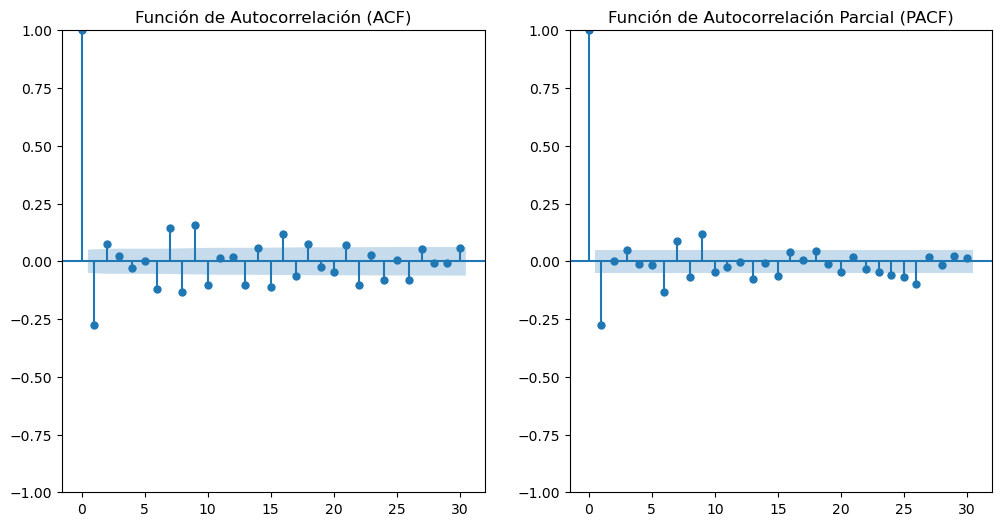

In [164]:
# Mostrar la función de autocorrelación y autocorrelación parcial
plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_acf(df['Close_diff'].dropna(), lags=30, ax=plt.gca())
plt.title("Función de Autocorrelación (ACF)")
plt.subplot(122)
plot_pacf(df['Close_diff'].dropna(), lags=30, ax=plt.gca())
plt.title("Función de Autocorrelación Parcial (PACF)")
plt.show()

### Pregunta 5 ###
¿Cual es el orden del modelo autoregresivo que se ha seleccionado y por qué?

***Respuesta:***

Dado que en la gráfica de autocorrelación parcial pega un salto brusco en el primer escalón el modelo más adecuado es AR1 lo que nos indica que el valor actual de la serie está principalmente influenciado por su valor inmediatamente anterior. 

Una vez escogido el orden del modelo autorregresivo, pasamos a entrenar el modelo y a predecir los 30 últimos valores. Por tanto lo primero será, como en ejercicios anteriores, separar por un lado la serie original transformada en estacionaria en caso de que no lo fuera, y eso si, quitandole los últimos 30 puntos. Una vez entrenado, se ha de mostrar el resumen de los parametros del modelo, coeficientes y demás métricas habituales. A continuación, utilizar el modelo para predecir los últimos 30 valores y mostrarlos en un gráfico de lineas junto con la serie original. Antes de pintarlos, en caso de que la serie original haya sido transformada para convertirla en estacionaria, será necesario deshacer las transformaciones de los valores predichos y, ahora si, pintarla junto con los valores de la serie original.

In [169]:
# Separar en conjunto de entrenamiento y validación 
serie_estacionaria = df_filtrado['Close'].diff().dropna()
train = serie_estacionaria.iloc[:-30]
test = serie_estacionaria.iloc[-30:]

In [170]:
# Crear y ajustar el modelo autorregresivo del orden escogido
modelo_ar1 = ARIMA(train, order=(1, 0, 0))  
resultado = modelo_ar1.fit()

C:\Users\Usuario\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Usuario\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Usuario\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [171]:
# Mostrar el resumen de los parametros y resultados del entrenamiento del modelo
print(resultado.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  283
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -820.023
Date:                Wed, 26 Mar 2025   AIC                           1646.045
Time:                        20:11:47   BIC                           1656.981
Sample:                             0   HQIC                          1650.430
                                - 283                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2971      0.201      1.478      0.140      -0.097       0.691
ar.L1         -0.3321      0.037     -8.940      0.000      -0.405      -0.259
sigma2        19.2386      1.164     16.534      0.0

In [172]:
# Predecir los últimos 30 valores utilizando el modelo entrenado
predicciones = resultado.forecast(steps=30)

C:\Users\Usuario\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Usuario\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [173]:
# Deshacer las transformaciones sobre los valores predichos
ultima_valor_original = df_filtrado['Close'].iloc[-31]  
predicciones_originales = np.cumsum(predicciones) + ultima_valor_original

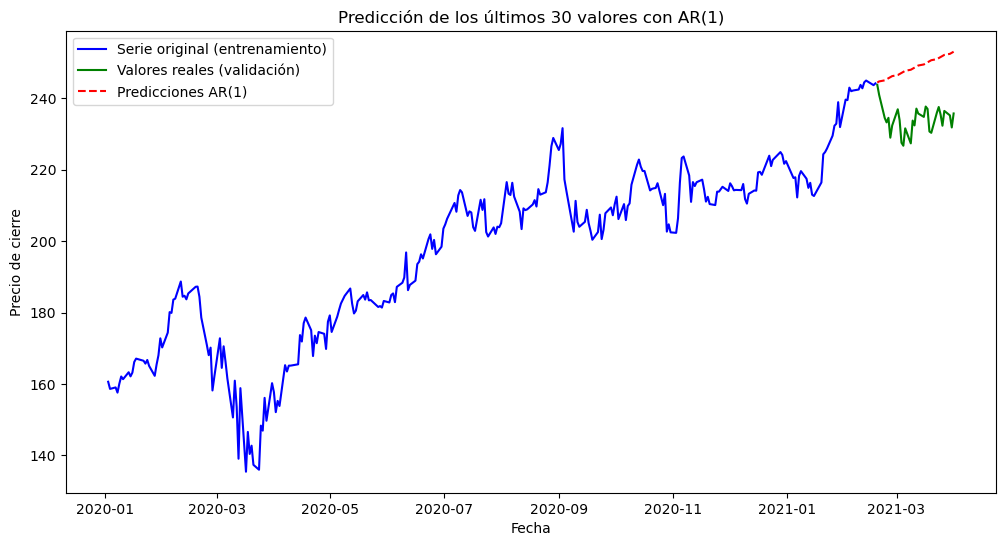

In [174]:
# Mostrar en gráfica la serie original y los valores predichos
plt.figure(figsize=(12, 6))
plt.plot(df_filtrado.index[:-30], df_filtrado['Close'].iloc[:-30], label="Serie original (entrenamiento)", color="blue")
plt.plot(df_filtrado.index[-30:], df_filtrado['Close'].iloc[-30:], label="Valores reales (validación)", color="green")
plt.plot(df_filtrado.index[-30:], predicciones_originales, label="Predicciones AR(1)", linestyle="dashed", color="red")
plt.legend()
plt.title("Predicción de los últimos 30 valores con AR(1)")
plt.xlabel("Fecha")
plt.ylabel("Precio de cierre")
plt.show()

### Pregunta 6 ###
A la vista de los resultados obtenidos en el entrenamiento del modelo, ¿qué podemos decir de los residuos y por tanto de la validez estadística del modelo?. En cuanto a la pinta que tiene el resultado final visualizado en el gráfico, ¿Qué conclusiones podemos sacar sobre el modelo? ¿es adecuado para predecir valores futuros de la serie? ¿De qué manera influye en esta valoración el hecho de que hayamos seleccionado para validar los últimos 30 puntos con respecto a la pinta que tendría si solo hubieran sido los últimos 20?

***Respuesta:*** Los residuos no tienen autocorrelación pero no siguen una distribución normal además su varianza no es constante lo cual a pesar de su distribución normal parece indicar que no es el modelo óptimo. Con todo esto, el modelo no es adecuado para predecir los valores futuros de la serie. Si solo se hiciera con 20 puntos no se capturaría tan bien la tendencia y podría darnos error de que el modelo es más preciso de lo que realmente es. 

Por último, el alumno debe optimizar el modelo, cambiando el orden de las componentes AR, I y MA del modelo ARIMA, hasta llegar a una combinación que mejore el anterior modelo y que pueda ser incluso utilizable para predecir valores futuros de la serie. Para ello puede optar por realizarlo de forma manual probando distintas combinaciones o mediante algún algoritmo automático que encuentre la mejor combinación de ordenes para el modelo.

C:\Users\Usuario\AppData\Local\Temp\ipykernel_18436\2481376176.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['Close_diff'] = df_filtrado['Close'].diff()
C:\Users\Usuario\AppData\Local\Temp\ipykernel_18436\2481376176.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado.dropna(inplace=True)


Nuevo p-valor: 5.00931678884373e-06


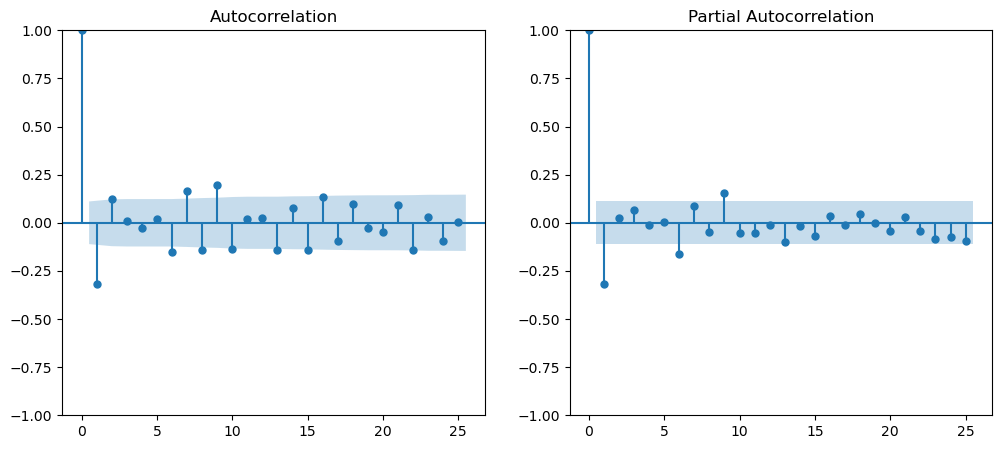

In [178]:
# Para el método manual, evaluar la ACF y PACF de la serie estacionaria (transformada si fuera necesario)
df_filtrado['Close_diff'] = df_filtrado['Close'].diff()
df_filtrado.dropna(inplace=True)
resultado_adf = adfuller(df_filtrado['Close_diff'])
print(f'Nuevo p-valor: {resultado_adf[1]}')
fig, ax = plt.subplots(1,2, figsize=(12,5))
plot_acf(df_filtrado['Close_diff'].dropna(), ax=ax[0])  
plot_pacf(df_filtrado['Close_diff'].dropna(), ax=ax[1])
plt.show()

In [179]:
# Encontrar los ordenes p y q adecuados para las partes AR y MA

In [180]:
# Aplicar el modelo ARIMA incluyendo los ordenes p y q, pero además incluyendo el orden de diferenciación d
modelo = ARIMA(df_filtrado['Close'], order=(1, 1, 1)) 
modelo_entrenado = modelo.fit()
print(modelo_entrenado.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  313
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -901.408
Date:                Wed, 26 Mar 2025   AIC                           1808.817
Time:                        20:11:48   BIC                           1820.046
Sample:                             0   HQIC                          1813.305
                                - 313                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3766      0.119     -3.153      0.002      -0.611      -0.142
ma.L1          0.0673      0.129      0.524      0.601      -0.185       0.319
sigma2        18.9167      1.109     17.058      0.0

C:\Users\Usuario\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Usuario\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Usuario\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


C:\Users\Usuario\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Usuario\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


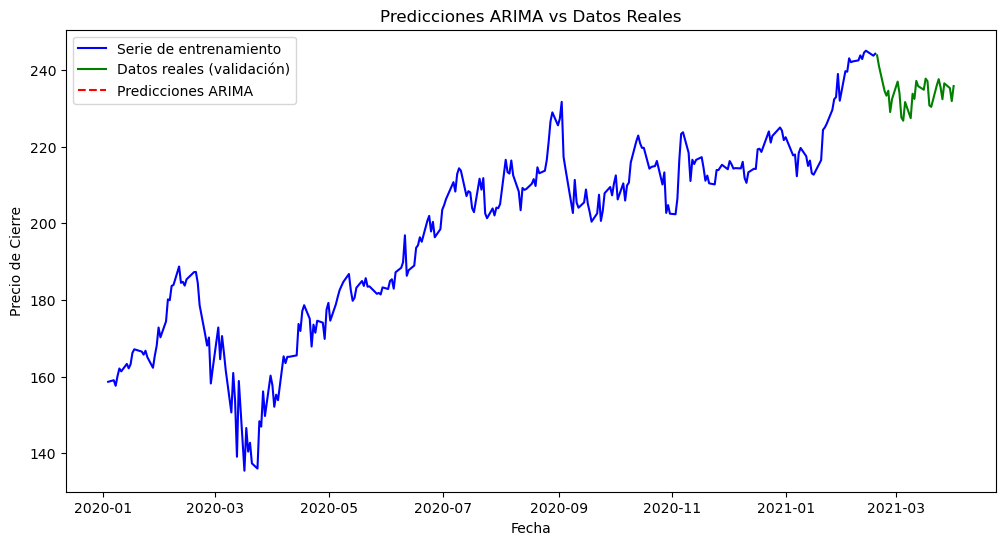

In [181]:
# Predecir y pintar los resultados como en puntos anteriores
train = df_filtrado.iloc[:-30]
test = df_filtrado.iloc[-30:]

predicciones = modelo_entrenado.forecast(steps=30)
predicciones_df = pd.DataFrame(predicciones, index=test.index, columns=['Predicciones'])
plt.figure(figsize=(12,6))
plt.plot(train.index, train['Close'], color='blue', label='Serie de entrenamiento')
plt.plot(test.index, test['Close'], color='green', label='Datos reales (validación)')
plt.plot(predicciones_df.index, predicciones_df['Predicciones'], color='red', linestyle='--', label='Predicciones ARIMA')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre')
plt.title('Predicciones ARIMA vs Datos Reales')
plt.legend()
plt.show()

### Pregunta 7 ###
Hacer una interpretación libre del modelo entrenado y de los resultados obtenidos. ¿Sería utilizable para predicción de valores futuros de la serie temporal?

***Respuesta:***

Por un lado podemos ver que el modelo con ARIMA se ajusta muy bien al periodo que hemos establecido lo que indica que a corto plazo es fiable para predecir los valores futuros si las condiciones son similares a las del periodo de entrenamiento y el de validación. Por otro lado el plazo dado de 30 días puede resultar corto en comparación al modelo de entrenamiento lo que puede hacer que se ajuste demasiado al modelo de validación ante esto, podemos aumentar el plazo de predicción del modelo para verlo en circunstancias reales y comprobar la robustez del modelo. 